In [1]:
import IPython
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy import fftpack

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

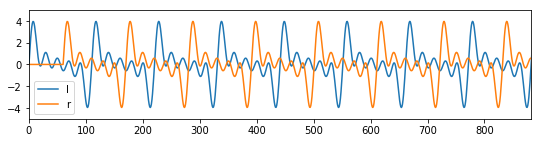

In [19]:
class tonegen: 
    
    
    def __init__(self, samplerate):
        self.fs = samplerate
    
        f = 10000

        self.x = np.arange(self.fs)
        
        
        self.dur = np.shape(self.x)[0]
        
        self.y = [ 0 for i in range(self.dur)]

    def addfreq(self,f):
        addy = [ np.sin(2*np.pi*f* (i/self.fs)) for i in range(self.dur)]
        self.y = np.add(self.y, addy)
        
    def subfreq(self,f):
        addy = [ np.sin(2*np.pi*f* (i/self.fs)) for i in range(self.dur)]
        self.y = np.subtract(self.y, addy)

    def get(self):
        return self.x,self.y
    
    def getrate(self):
        return self.fs
    
    def compose(self, freqlist):
        for freq in freqlist:
            self.addfreq(freq)
    
    def remove(self, freqlist):
        for freq in freqlist:
            self.subfreq(freq)
            
    def build(self, f0, steps):
        for step in range(steps):
            self.addfreq(f0*(step+1))
    
tone = tonegen(44100)
#tone.compose([4,100,400])


tone.build(f0=400, steps=5)


# tone.addfreq(400)
# tone.addfreq(500)
# tone.addfreq(600)


x,y = tone.get()


tonepic = pd.DataFrame()

def rightearcues(delay=0,volume=1):
    tonepic['r'] = tonepic['r'].shift(delay).fillna(0)
    tonepic['r'] = tonepic['r']*volume

tonepic['l'] = y
tonepic['r'] = y


rightearcues(delay=60, volume=1)


tonepic.plot(xlim=(0,44100/50), ylim=(-5,5), figsize=(9,2));
IPython.display.Audio(data=[tonepic['l'],tonepic['r']], rate=tone.getrate(), autoplay=True)


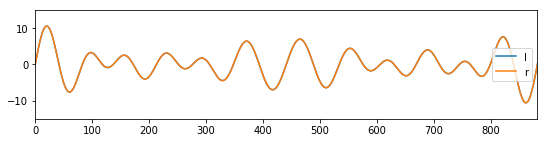

In [9]:
tone.addfreq(400)
tone.addfreq(500)
tone.addfreq(600)
tone.addfreq(650)

x,y = tone.get()
tonepic = pd.DataFrame()

tonepic['l'] = y
tonepic['r'] = y

tonepic.plot(xlim=(0,44100/50), ylim=(-15,15), figsize=(9,2));
IPython.display.Audio(data=[tonepic['l'],tonepic['r']], rate=tone.getrate(), autoplay=True)


In [6]:
myfft = fftpack.rfft(y, axis=0)